In [5]:
%pip install jax
%pip install jaxlib

from PIL import Image
from jax import random

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 1.2 MB/s eta 0:00:0000:0100:010m
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 2.6 MB/s eta 0:00:0000:0100:01
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.0/35.0 MB 3.0 MB/s eta 0:00:0000:0100:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  DEPRECATION: jax is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
  Running setup.py install for jax ... done

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: yo

In [93]:
%pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 545.0 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 2.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 1.8 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 2.0 MB/s eta 0:00:00a 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [95]:
import jax
import jax.numpy as jnp
from jax import random
from typing import Tuple
import numpy as onp
import matplotlib.pyplot as plt

In [96]:
KEY = random.PRNGKey(42)

def generate_rectangle_coordinates(rng_key: random.PRNGKey, img_width: int, img_height: int, ship_width: Tuple, ship_height: Tuple) -> Tuple:
        _, key_1, key_2 = jax.random.split(rng_key, 3)
        # sample start coordinates
        x = random.randint(key_1,(1,),  0, img_width - ship_width[1])
        y = random.randint(key_2,(1,), 0, img_width - ship_height[1])

        random_width = random.randint(key_1,(1,),  ship_width[0],  ship_width[1])
        random_height = random.randint(key_2,(1,),  ship_height[0],  ship_height[1])
        return x, y, x + random_width, y + random_height

def make_image(width: int, height: int, ship_width: Tuple, ship_height: Tuple):
        img = onp.zeros((width, height))
        ship_coords = generate_rectangle_coordinates(KEY, width, height, ship_width, ship_height)
        img[int(ship_coords[0]):int(ship_coords[2]), int(ship_coords[1]):int(ship_coords[3])] = 1
        return img

In [97]:
img = make_image(512, 512, (10, 20), (10, 20))

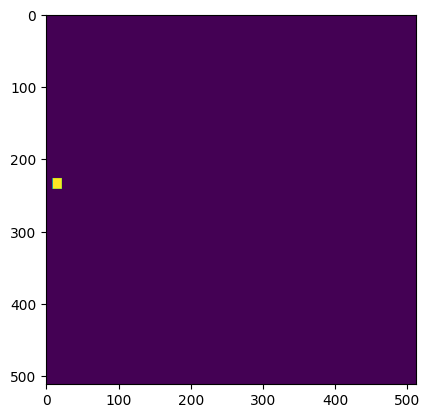

In [98]:
plt.imshow(img)

In [75]:
test_img = jnp.zeros((5,5))

In [82]:
test_img.at[(2,3), (1,2,3)].get(mode='fill', fill_value=-1)

ValueError: Incompatible shapes for broadcasting: shapes=[(2,), (3,)]

In [65]:
jnp.array([range(ship_coords[0][0], ship_coords[2][0]), range(ship_coords[1][0], ship_coords[3][0])])

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [66]:
jnp.array(range(ship_coords[1][0], ship_coords[3][0]))

Array([ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21], dtype=int32)

In [67]:
jnp.array(range(ship_coords[0][0], ship_coords[2][0]))

Array([227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239,
       240, 241], dtype=int32)